# Can't Spell Lakers Without An "L"

By Varun Ramani, William Liao, and Andrew Yuan

In [1]:
import warnings
warnings.simplefilter('ignore')

## Motivation

For a long time, the Los Angeles Lakers dominated the game of basketball. They are considered one of the greatest basketball franchises of all time, with players like Magic Johnson, Kobe Bryant, and Shaquille O'Neal all donning the purple and gold jerseys in their prime. In recent years, the Lakers have great players like LeBron James and Anthony Davis on their roster, and they became NBA champions in the 2019-2020 season, beating out 29 other teams for the title. However, the team's dominant reign sputtered and died humiliatingly recently - the Lakers failed to even make the playoffs this season (2021 - 2022). Lakers fans were obviously disappointed in this dramatic fall from grace in the span of just two years, and there were many articles written by sports critics and fans to try to pin the blame on something / someone for this disastrous season.

* Article on Fadeaway World written by Eddie Bitar ([here](https://fadeawayworld.net/nba/5-reasons-why-the-lakers-season-has-been-a-disaster-lebron-westbrook-davis-are-all-at-fault))
* Los Angeles Sports Nation article on the Lakers season failure ([here](https://laxsportsnation.com/2022/04/11/goodbye-2021-2022-lakers-what-went-wrong/))
* FiveThirtyEight article on the Lakers season ([here](https://fivethirtyeight.com/features/this-lakers-season-was-a-trainwreck-and-theres-no-easy-way-to-get-back-on-track/))
* New York Post article on the future of the Lakers ([here](https://nypost.com/2022/04/06/whats-next-for-the-lakers-after-nba-playoff-elimination/))

The disastrous season has major implications as well. The head coach for the Lakers, Frank Vogel, has already been fired, and the Lakers are currently in search of a new head coach. Every trade season opens the door to exciting possibilities, and this year's trade season is especially important for the Lakers. The Lakers will need to accurately identify what went wrong during the season in order to make the fixes or trades necessary to return to the glory they basked in just two years ago.

After reading the sports journal articles above, our team boiled it down to four possible reasons / people to blame:

* Russell Westbrook, the big player acquisition that the Lakers made ahead of the 2021-22 season
* The overall Lakers defense / ability to prevent opposing teams from scoring
* Untimely injuries to star players like Anthony Davis and LeBron James
* Bad front-office trades resulting in bad team composition within the 2021-22 team

The team's objective is to use data and statistics to see if any of these reasons have significant statistical backing, and we hope you (the reader) are able to learn more about analyzing data through Python, proving or disproving claims using statisitcs, while also gaining a better understanding of how data science can be applied to contexts such as basketball and sports.

## Question 1: Was It Russell Westbrook's Fault?

The biggest trade that the Lakers conducted coming into the 2021-22 season was that they traded away Kentavious Caldwell-Pope, Montrezl Harrell, and Kyle Kuzma to the Washington Wizards in exchange for Russell Westbrook. This was a big financial move from the Lakers as well, as they signed Westbrook to a $47 million deal (for three years). 

Many fans did not think that Russell Westbrook matched their expectations and that Westbrook should have delivered more based on the money that the Lakers are paying him. The fans have blamed Russell Westbrook as one of the causes of the Laker's underperformance this season, and this begs the question - did Russell Westbrook have a statistically abnormal season during his current tenure as a Laker, or did he perform about as well as he has been performing historically (in other words the Lakers got what they paid for)?

Our null hypothesis in this instance would be that Russell Westbrook did not underperform significantly, and the fans would be correct if we are able to disprove the null hypothesis.

#### Data Collection
We retrieved all historical data for Russell Westbrook from [Basketball Reference](https://www.basketball-reference.com/players/w/westbru01.html). The dataset included data for all 14 seasons that Russell Westbrook has played in starting from the 2008-09 season to the 2021-22 season. There were multiple aggregate statistics (per season) included in the dataset that we could then analyze.

#### Data Management/Representation

Let's import the .csv file into Python. The library we chose to utilize is the Pandas library, which offers many useful tools for data science ([See Pandas documentation here](https://pandas.pydata.org/)). After we import it, let's take a quick glance at our data.

In [2]:
import pandas as pd
westbrook_stats = pd.read_csv("../Datasets/Westbrook Stuff/westbrook.csv")
westbrook_stats

,Season_Start,Season_End,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2008,2009,20,OKC,NBA,PG,82,65,32.5,5.3,...,0.815,2.2,2.7,4.9,5.3,1.3,0.2,3.3,2.3,15.3
1,2009,2010,21,OKC,NBA,PG,82,82,34.3,5.9,...,0.780,1.7,3.1,4.9,8.0,1.3,0.4,3.3,2.5,16.1
2,2010,2011,22,OKC,NBA,PG,82,82,34.7,7.5,...,0.842,1.5,3.1,4.6,8.2,1.9,0.4,3.9,2.5,21.9
3,2011,2012,23,OKC,NBA,PG,66,66,35.3,8.8,...,0.823,1.5,3.1,4.6,5.5,1.7,0.3,3.6,2.2,23.6
4,2012,2013,24,OKC,NBA,PG,82,82,34.9,8.2,...,0.800,1.4,3.9,5.2,7.4,1.8,0.3,3.3,2.3,23.2
5,2013,2014,25,OKC,NBA,PG,46,46,30.7,7.5,...,0.826,1.2,4.5,5.7,6.9,1.9,0.2,3.8,2.3,21.8
6,2014,2015,26,OKC,NBA,PG,67,67,34.4,9.4,...,0.835,1.9,5.4,7.3,8.6,2.1,0.2,4.4,2.7,28.1
7,2015,2016,27,OKC,NBA,PG,80,80,34.4,8.2,...,0.812,1.8,6.0,7.8,10.4,2.0,0.3,4.3,2.5,23.5
8,2016,2017,28,OKC,NBA,PG,81,81,34.6,10.2,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
9,2017,2018,29,OKC,NBA,PG,80,80,36.4,9.5,...,0.737,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4


In [131]:
westbrook_stats.isnull().values.any()

False

Nice! We've got a dataframe with no missing values and also has 31 columns with most of them being player statistics that we can look at. The column headers are abbreviated, but we can always look back at our original Basketball Reference source to find what the abbreviations mean. 

#### Exploratory Analysis

First, let's examine the points per game that Russell Westbrook averaged over each season that he played in. In basketball, you win if you outscore the other team, so it makes sense to take a look at Russell Westbrook's point-scoring ability. 

We import matplotlib to help us visualize the data. Matplotlib is a Python library that can be used to create all sorts of graphs and visualizations ([Read more here](https://matplotlib.org/)). Using the .plot() function, we specify the columns to plot, and also using other matplotlib functions to specify graph titles and axis labels ([Learn more about setting graph titles / labels here](https://www.w3schools.com/python/matplotlib_labels.asp)).

Text(0.5, 1.0, 'Points Per Game for Russell Westbrook Over His Career')

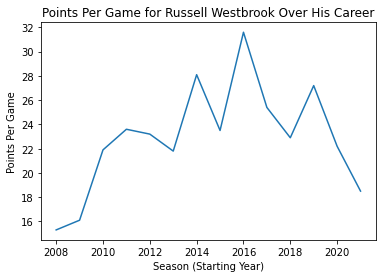

In [3]:
import matplotlib.pyplot as plt

plt.plot(westbrook_stats["Season_Start"], westbrook_stats["PTS"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Points Per Game")
plt.title('Points Per Game for Russell Westbrook Over His Career')

Looks like Westbrook did have a scoring drop in 2021! What are some other statistics that may be worth looking at? Well, considering a big controversy this season was that Lakers fan dubbed Westbrook 'Westbrick' ([News Article on Westbrick nickname](https://nba.nbcsports.com/2022/03/08/russell-westbrook-says-he-can-no-longer-tolerate-westbrick-nickname/)), we should look at effective field goal percentage to see if Westbrook truly 'bricks' (or misses) his shots this season. 

Field goal percentage is calculated by shots made divided by shots attempted. However, in the game of basketball, there are 2-point field goals and 3-point field goals, 3 pointers being much more difficult to make than 2 pointers in most cases. Because of this, across the board players have lower three point percentages than two pointer percentages. So the effective field goal percentage adjusts for this difference by weighting three point percentage less than two point percentage so players are penalized less for taking difficult shots. Effective field goal percentage is calculated by 2-point field goals + 0.5 * 3-point field goals divided by total field goal attempts. 

Text(0.5, 1.0, 'Effective Field Goal Percentage for Russell Westbrook Over His Career')

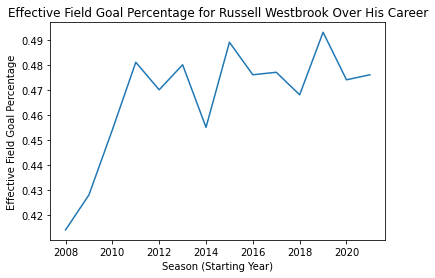

In [133]:
plt.plot(westbrook_stats["Season_Start"], westbrook_stats["eFG%"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Effective Field Goal Percentage")
plt.title('Effective Field Goal Percentage for Russell Westbrook Over His Career')

We've looked at Westbrook's ability to score now. How about his ability to prevent the opposing team from scoring? One big statistic we can look at is turnovers per game. A turnover is defined as a player giving up the ball to the opposing team before their team is able to attempt a shot. If players have high turnovers, then they are giving up the ball often and giving the other team more chances to score. 

Text(0.5, 1.0, 'Turnovers Per Game for Russell Westbrook Over His Career')

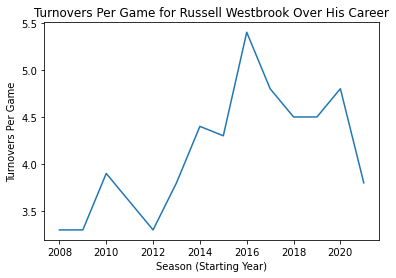

In [134]:
plt.plot(westbrook_stats["Season_Start"], westbrook_stats["TOV"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Turnovers Per Game")
plt.title('Turnovers Per Game for Russell Westbrook Over His Career')

Another way to look at a player's defensive ability is to look at their defensive box plus/minus score. The defensive box plus/minus score is calculated with a long formula ([See how it is calculated here](https://hackastat.eu/en/learn-a-stat-box-plus-minus-and-vorp/)) but in short, the box score estimates the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team. 

Text(0.5, 1.0, 'Defensive Box +/- Score for Russell Westbrook Over His Career')

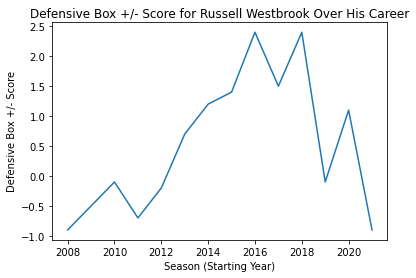

In [135]:
westbrook_advanced_stats = pd.read_csv("../Datasets/Westbrook Stuff/westbrook_advanced.csv")

plt.plot(westbrook_advanced_stats["Season_Start"], westbrook_advanced_stats["DBPM"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Defensive Box +/- Score")
plt.title('Defensive Box +/- Score for Russell Westbrook Over His Career')

#### Hypothesis Testing

As a reminder, our null hypothesis is that Russell Westbrook did not have a statistically abnormal season - in other words, he played in line with what he been doing in previous seasons. 

We've chosen the above four statistics to focus on due to reasons outlined in the markdown cells in the Exploratory Analysis section - two statistics look at offensive capabilities while two statistics look at defensive capabilities. 

Our approach is now to look at how far the 2021-22 performance deviated from the expected performance. In mathematical terms, how many standard deviations from the mean was Westbrook's performance? The standard is that if a datapoint is three standard deviations away from the mean, it is considered an outlier. You can read more on this approach [here](https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html).

In [136]:
# Calculate the mean and standard deviation for each of the statistics we're interested in

statistics_without_20_21_season = westbrook_stats[westbrook_stats["Season_Start"] != 2021]

ppg_mean = statistics_without_20_21_season["PTS"].mean()
ppg_sd = statistics_without_20_21_season["PTS"].std()

efg_mean = statistics_without_20_21_season["eFG%"].mean()
efg_sd = statistics_without_20_21_season["eFG%"].std()

tov_mean = statistics_without_20_21_season["TOV"].mean()
tov_sd = statistics_without_20_21_season["TOV"].std()

advanced_statistics_without_20_21_season = westbrook_advanced_stats[
    westbrook_advanced_stats["Season_Start"] != 2021]

dbpm_mean = advanced_statistics_without_20_21_season["DBPM"].mean()
dbpm_sd = advanced_statistics_without_20_21_season["DBPM"].std()

In [139]:
westbrook_20_21 = westbrook_stats.iloc[13]

ppg_20_21 = westbrook_20_21["PTS"]
efg_20_21 = westbrook_20_21["eFG%"]
tov_20_21 = westbrook_20_21["TOV"]

adv_westbrook_20_21 = westbrook_advanced_stats.iloc[13]
dbpm_20_21 = adv_westbrook_20_21["DBPM"]

print("Points Per Game: " + str(abs(ppg_20_21 - ppg_mean)/ppg_sd) 
    + " standard deviations away from the mean")
print("Effective Field Goal Percentage: " + str(abs(efg_20_21 - efg_mean)/efg_sd) 
    + " standard deviations away from the mean")
print("Turnovers Per Game: " + str(abs(tov_20_21 - tov_mean)/tov_sd) 
    + " standard deviations away from the mean")
print("Defensive Box +/- Score: " + str(abs(dbpm_20_21 - dbpm_mean)/dbpm_sd) 
    + " standard deviations away from the mean")

Points Per Game: 1.0873155067000648 standard deviations away from the mean
Effective Field Goal Percentage: 0.4297851611157377 standard deviations away from the mean
Turnovers Per Game: 0.5163836127856927 standard deviations away from the mean
Defensive Box +/- Score: 1.3553313531838171 standard deviations away from the mean


#### Insights Gained

As you can see with our calculations, Westbrook's performance this season is actually pretty in line with his historical performance. His defensive box +/- is the most standard deviations away from the mean, but even then, he is only 1.355 standard deviations from his own historical mean. Therefore, we are unable to reject the null hypothesis and definitively pin the blame on Russell Westbrook. 

## Question 2: Did Bad Lakers Defense Cripple the Lakers?

Many fans have been vocally critical about the Laker's defensive abilities this year. Namely, Lakers have made trades to create a team that fans have deemed more offense-oriented as opposed to defense-oriented. However, is there statistical backing that the Lakers defense was considerably worse this year?

#### Data Collection

We used a Kaggle dataset ([here](https://www.kaggle.com/datasets/nathanlauga/nba-games)) for data on all NBA games (not just Lakers games) from the 2004 season to the 2021 season. The dataset also included data such as points each team scored during the game, as well as overall team statistics per game. 

#### Data Management/Representation

One of the most direct ways of assessing a team's defensive abilities is to look at how much the opposing team scored against the team in each game. If you have good defense, you should be stopping the other team from scoring points. Therefore, we want to look at the historic games the Lakers have played, and look at how many points the opposing team has scored against the Lakers. To assess Lakers defense using this metric, we are assuming that the opposing team have the same offensive capabilities throughout (in other words they are scoring more against the Lakers because Lakers defense got worse, and not because the team's offense got better).

Keeping this assumption in mind, we chose to look at data from the previous ten years over the alternative of looking at every single datapoint we have because there is great variability between a team now and that same team forty years ago. For example, the Detroit Pistons are not very good currently, but were championship contenders in the 1980s. 

In [4]:
import pandas as pd
games = pd.read_csv("../Datasets/Defense/games.csv")

games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,3/9/2022,22100980,Final,1610612761,1610612747,2021,1610612766,101.0,0.424,0.750,...,18.0,46.0,1610612738,115.0,0.495,0.786,0.324,30.0,47.0,0
1,3/12/2022,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
2,3/12/2022,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
3,3/12/2022,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
4,3/12/2022,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25792,10/6/2014,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25793,10/6/2014,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25794,10/6/2014,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25795,10/5/2014,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Now, we want to extract all the games that the Laker's were apart of (both home games and visiting games). We first find the team ID for the Lakers by examining the "game_details.csv" file also made available to us in the set of csvs included in our Kaggle dataset. Afterwards, we filter for Lakers games.  

We also noted that we want to look at data from the ten seasons prior to the 2021 season to benchmark the Laker's defensive abilities in 2021. Therefore, we filter for that as well. 

In [5]:
LAKERS_TEAM_ID = 1610612747

laker_games = games.loc[(games["HOME_TEAM_ID"] == LAKERS_TEAM_ID) | (games["VISITOR_TEAM_ID"] == LAKERS_TEAM_ID)]

laker_games_last_ten = laker_games[laker_games["SEASON"] > 2010]

laker_games_last_ten

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,3/9/2022,22100980,Final,1610612761,1610612747,2021,1610612766,101.0,0.424,0.750,...,18.0,46.0,1610612738,115.0,0.495,0.786,0.324,30.0,47.0,0
17,3/11/2022,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,25.0,37.0,1610612764,109.0,0.459,0.667,0.333,21.0,47.0,1
24,3/9/2022,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,25.0,50.0,1610612747,130.0,0.465,0.692,0.383,25.0,48.0,1
43,3/7/2022,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,28.0,47.0,1610612747,110.0,0.473,0.696,0.308,19.0,43.0,1
59,3/5/2022,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,25.0,47.0,1610612744,116.0,0.500,0.474,0.441,22.0,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25727,10/19/2014,11400082,Final,1610612747,1610612762,2014,1610612747,98.0,0.400,0.867,...,18.0,37.0,1610612762,91.0,0.485,0.714,0.333,21.0,40.0,1
25745,10/16/2014,11400064,Final,1610612747,1610612762,2014,1610612747,86.0,0.410,0.581,...,15.0,41.0,1610612762,119.0,0.512,0.692,0.444,30.0,50.0,0
25764,10/12/2014,11400042,Final,1610612747,1610612744,2014,1610612747,75.0,0.366,0.882,...,17.0,37.0,1610612744,116.0,0.562,0.677,0.394,33.0,44.0,0
25778,10/9/2014,11400026,Final,1610612747,1610612744,2014,1610612747,105.0,0.438,0.722,...,22.0,42.0,1610612744,120.0,0.560,0.667,0.571,27.0,39.0,0


Looks like we have 965 Laker games to look at! However, let's tidy up this data a bit first. Since we now have just Lakers data, we don't really want to keep looking at HOME_TEAM_ID and VISITING_TEAM_ID. We would much rather look at a column containing OPPOSING_TEAM_ID. Additionally, we have a HOME_TEAM_WINS column that we would like to convert into a LAKERS_WIN column holding values 1 if the Lakers won, and 0 if the Lakers lost. Also, we want to create OPPOSING_TEAM_SCORE since our current dataframe has PTS_home and PTS_away instead. 

Let's make those columns now!

In [6]:
def get_opposing_team (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["VISITOR_TEAM_ID"]
    else:
        return row["HOME_TEAM_ID"]

laker_games_last_ten["OPPOSING_TEAM_ID"] = laker_games_last_ten.apply( lambda row: get_opposing_team(row), axis = 1)

def get_lakers_win (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["HOME_TEAM_WINS"]
    else:
        return 1 if (row["HOME_TEAM_WINS"] == 0) else 0

laker_games_last_ten["LAKERS_WIN"] = laker_games_last_ten.apply( lambda row: get_lakers_win(row), axis = 1)

def get_opposing_team_score (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["PTS_away"]
    else:
        return row["PTS_home"]

laker_games_last_ten["OPPOSING_PTS"] = laker_games_last_ten.apply( lambda row: get_opposing_team_score(row), axis = 1)

laker_games_last_ten

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
0,3/9/2022,22100980,Final,1610612761,1610612747,2021,1610612766,101.0,0.424,0.750,...,115.0,0.495,0.786,0.324,30.0,47.0,0,1610612761,1,101.0
17,3/11/2022,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,109.0,0.459,0.667,0.333,21.0,47.0,1,1610612764,1,109.0
24,3/9/2022,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,130.0,0.465,0.692,0.383,25.0,48.0,1,1610612745,0,139.0
43,3/7/2022,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,110.0,0.473,0.696,0.308,19.0,43.0,1,1610612759,0,117.0
59,3/5/2022,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,1610612744,1,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25727,10/19/2014,11400082,Final,1610612747,1610612762,2014,1610612747,98.0,0.400,0.867,...,91.0,0.485,0.714,0.333,21.0,40.0,1,1610612762,1,91.0
25745,10/16/2014,11400064,Final,1610612747,1610612762,2014,1610612747,86.0,0.410,0.581,...,119.0,0.512,0.692,0.444,30.0,50.0,0,1610612762,0,119.0
25764,10/12/2014,11400042,Final,1610612747,1610612744,2014,1610612747,75.0,0.366,0.882,...,116.0,0.562,0.677,0.394,33.0,44.0,0,1610612744,0,116.0
25778,10/9/2014,11400026,Final,1610612747,1610612744,2014,1610612747,105.0,0.438,0.722,...,120.0,0.560,0.667,0.571,27.0,39.0,0,1610612744,0,120.0


Lastly, let's remove some columns that we will have no use for.

In [7]:
cleaned_lakers = laker_games_last_ten[['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'OPPOSING_TEAM_ID', 'LAKERS_WIN', 'OPPOSING_PTS']].copy()

cleaned_lakers

,GAME_DATE_EST,GAME_ID,SEASON,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
0,3/9/2022,22100980,2021,1610612761,1,101.0
17,3/11/2022,22101004,2021,1610612764,1,109.0
24,3/9/2022,22100985,2021,1610612745,0,139.0
43,3/7/2022,22100973,2021,1610612759,0,117.0
59,3/5/2022,22100959,2021,1610612744,1,116.0
...,...,...,...,...,...,...
25727,10/19/2014,11400082,2014,1610612762,1,91.0
25745,10/16/2014,11400064,2014,1610612762,0,119.0
25764,10/12/2014,11400042,2014,1610612744,0,116.0
25778,10/9/2014,11400026,2014,1610612744,0,120.0


#### Exploratory Analysis

Let's explore our data a bit. Let's plot the opposing team scores per season, and also color code the points - green points represent games where the Lakers won, and red points represent games where the Lakers lost.

Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

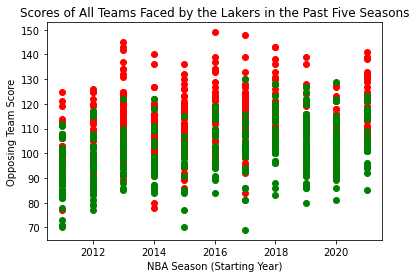

In [8]:
import matplotlib.pyplot as plt

wins_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 1]  
lose_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 0]
plt.scatter(lose_df["SEASON"], lose_df["OPPOSING_PTS"], color = 'red')  
plt.scatter(wins_df["SEASON"], wins_df["OPPOSING_PTS"], color = 'green')

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')

A quick look at our scatter plot confirms the relationship between the opposing team's score and the team's chance of winning - if the opposing team scores less, than your team would more likely win. To better see the distribution of points, let's add jitter to the points so that points are not overlapping! To do so, we will have to import the seaborn library. You can learn more about seaborn [here](https://seaborn.pydata.org/).

Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

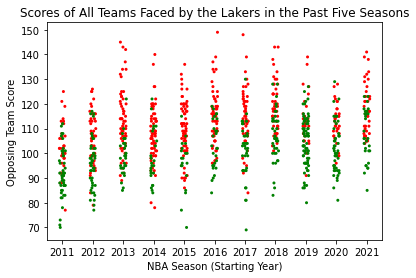

In [9]:
import seaborn as sns

jitter_graph = sns.stripplot(data =lose_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'red')
jitter_graph = sns.stripplot(data =wins_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'green')

jitter_graph.set_xlabel("NBA Season (Starting Year)")
jitter_graph.set_ylabel("Opposing Team Score")
jitter_graph.set_title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')

We must also note that some teams are simply better than others - we can't expect to compare the Laker's ability to defend against reigning conference champions against their ability to defend against teams who've not made the playoffs in years. Therefore, we choose to look at the Laker's performance against each team over the past five seasons instead. Let's calculate the average points scored against the Lakers by team per season!

In [10]:
unique_years = cleaned_lakers["SEASON"].unique()
teams = cleaned_lakers["OPPOSING_TEAM_ID"].unique()

team_score_map = {}
for team in teams:
    team_df = cleaned_lakers[cleaned_lakers.OPPOSING_TEAM_ID == team]
    scores_per_year = {}
    for year in unique_years:
        curr_df = team_df[team_df.SEASON == year]
        average_score = curr_df["OPPOSING_PTS"].mean()
        scores_per_year[year] = average_score
    team_score_map[team] = scores_per_year

Having our data in the form of a hashmap isn't ideal for data analysis. Let's create a pandas dataframe from this hashmap so that we can plot / analyze the data easier.

In [11]:
avg_score_df = pd.DataFrame.from_records(team_score_map)
year = [2021, 2020, 2019, 2013, 2012, 2011, 2018, 2017, 2016, 2015, 2014]
avg_score_df["Year"] = year

sorted_avg_score = avg_score_df.sort_values(by=['Year'])

sorted_avg_score

,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766,Year
2011,78.0,90.5,92.0,92.333333,88.0,90.500000,95.545455,97.500000,106.000000,104.60,...,106.666667,105.666667,101.125000,92.0,89.250000,98.333333,106.0,88.0,73.0,2011
2012,97.0,107.5,96.5,97.750000,88.0,92.000000,115.000000,105.400000,108.750000,108.60,...,99.857143,99.142857,112.000000,112.0,101.800000,98.666667,99.5,88.0,96.5,2012
2013,108.5,98.0,114.0,107.666667,97.0,113.333333,113.400000,106.285714,122.500000,122.00,...,103.800000,108.750000,117.500000,106.0,100.666667,97.750000,116.5,100.5,97.5,2013
2014,100.0,112.0,114.5,105.500000,115.5,115.500000,104.800000,118.666667,99.666667,110.75,...,104.000000,100.666667,113.000000,108.0,96.200000,103.000000,104.5,90.5,98.0,2014
2015,103.0,105.5,120.0,99.000000,120.0,95.000000,115.000000,106.166667,118.750000,98.25,...,115.000000,110.500000,116.750000,103.0,103.500000,113.000000,102.5,98.0,104.5,2015
2016,105.0,114.0,122.0,101.250000,104.0,113.500000,117.600000,116.500000,129.000000,115.75,...,99.666667,116.000000,110.666667,118.0,100.250000,102.666667,117.5,111.5,113.0,2016
2017,108.5,107.0,117.0,128.666667,98.5,106.500000,114.500000,118.250000,121.750000,110.60,...,92.000000,101.666667,108.000000,112.0,107.500000,106.750000,105.0,102.5,103.5,2017
2018,111.5,124.0,103.0,113.250000,103.5,104.333333,116.600000,112.000000,123.500000,114.20,...,109.200000,124.750000,118.000000,116.0,105.000000,101.666667,117.0,105.5,107.5,2018
2019,98.5,125.5,99.0,111.500000,112.0,108.200000,111.888889,102.285714,108.500000,106.75,...,115.333333,100.666667,112.250000,110.0,96.666667,102.250000,109.5,99.0,101.0,2019
2020,99.0,108.0,97.0,107.000000,102.5,112.666667,101.333333,100.750000,108.000000,105.00,...,109.000000,109.333333,108.000000,111.0,113.333333,97.000000,121.5,118.0,99.0,2020


Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Ten Seasons')

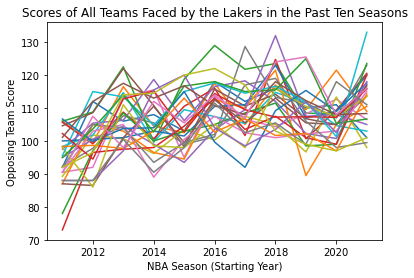

In [12]:
for team in teams:
    plt.plot(sorted_avg_score["Year"], sorted_avg_score[team]) 

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Ten Seasons') 

As a reminder, our null hypothesis is that the Lakers did not have a team with statistically worse defensive abilities than in previous years. However, we did not have enough datapoints to accurately run any type of test (ten data points is hard to run any statistical test while maintaining credibiility that your results should be trusted). For reasons described above, if we choose to introduce more datapoints (AKA look at previous seasons past ten seasons ago), we are introducing a high level of team performance variability that would go directly against our assumption that opposing team performance stays the same. Considering our project contains other more rigorous hypothesis testing components, we have opted to look at some summary statistics for this portion of the project and draw more surface-level and not as scientifically-rigorous conclusions from the results. 

From the graph above, each different color line represents a different team. You can see there is an increase in opposing team score for the majority of teams from the 2020-21 season to the 2021-22 season. Let's calculate how much the average increase is compared to the 2020-21 season, and also see how many teams experienced a scoring increase against the Lakers.

In [13]:
team_increases = {}
for team in teams:
    team_increases[team] = sorted_avg_score[team][2021] - sorted_avg_score[team][2020]

total_teams = len(teams)
pos = 0

for k in team_increases:
    if (team_increases[k] > 0):
        pos += 1

print("Out of a total of " + str(total_teams) + " teams, " + str(pos) + " teams experienced a positive scoring increase against the Lakers from 2020-21 to 2021-22.")

total_sum = 0
for k in team_increases:
    total_sum += team_increases[k]
    
print("The teams experienced an average of " + str(total_sum/total_teams) + " points increased scoring against the Lakers from 2020-21 to 2021-22.")


Out of a total of 29 teams, 22 teams experienced a positive scoring increase against the Lakers from 2020-21 to 2021-22.
The teams experienced an average of 6.659247648902822 points increased scoring against the Lakers from 2020-21 to 2021-22.


From the graph, we also notice that there seems to be a similar increase from the 2017-18 season to the 2018-19 season. Let's see the statistics for that increase as well. 

In [14]:
team_increases = {}
for team in teams:
    team_increases[team] = sorted_avg_score[team][2018] - sorted_avg_score[team][2017]

total_teams = len(teams)
pos = 0

for k in team_increases:
    if (team_increases[k] > 0):
        pos += 1

print("Out of a total of " + str(total_teams) + " teams, " + str(pos) + " teams experienced a positive scoring increase against the Lakers from 2017-18 to 2018-19.")

total_sum = 0
for k in team_increases:
    total_sum += team_increases[k]
print("The teams experienced an average of " + str(total_sum/total_teams) + " points increased scoring against the Lakers from 2017-18 to 2018-19.")

Out of a total of 29 teams, 21 teams experienced a positive scoring increase against the Lakers from 2017-18 to 2018-19.
The teams experienced an average of 4.827011494252874 points increased scoring against the Lakers from 2017-18 to 2018-19.


#### Insights Gained

Compared to the previous season, the Lakers did seem to have a worse defensive team. However, looking at previous years, such as the 2018-19 season, there was a similar spike in points increase. We can see that a similar series of events happened four years ago, so the scoring spike seen this season may perhaps not be as alarming as fans have made it out to be. However, there is certainly backing to the claim that Lakers defense was worse this year compared to previous years.

## Question 3: Were the Untimely Injuries the Cause of the Laker's Downfall?

One common explanation for the Lakers's underperformance is that as a result of the injuries plaguing the team, the Lakers were unable to reach their full potential. LeBron James himself has been quoted as saying, "The reason we were not very good together is we weren’t on the damn floor together." (See the quote [here](https://fadeawayworld.net/nba-media/lebron-james-explains-why-the-lakers-big-3-werent-good-together-because-we-werent-on-the-damn-floor-together)) In the quote, "we" refers to 3 players in particular: LeBron James, Anthony Davis, and Russell Westbrook. We will examine the relative performance of the Lakers with and without key combinations of players to determine if certain player absences had a significant effect on the team's performance.

This time, since we need up-to-date individual game data from the 2021-22 season, we use data provided by sportsdataverse, a python package for working with sports data. The documentation is available at https://py.sportsdataverse.org/.

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import binom
import sportsdataverse.nba

In [174]:
nba_df = sportsdataverse.nba.load_nba_player_boxscore(seasons=range(2022, 2023))
nba_df.tail()

,athlete_display_name,team_short_display_name,min,fg,fg3,ft,oreb,dreb,reb,ast,...,athlete_position_abbreviation,team_name,team_logo,team_id,team_abbreviation,team_color,game_id,season,season_type,game_date
27555,Stephen Curry,Warriors,40,10-27,6-17,3-4,0,7,7,5,...,PG,Warriors,https://a.espncdn.com/i/teamlogos/nba/500/gs.png,9,GS,003da5,401434775,2022,3,2022-05-14
27556,Klay Thompson,Warriors,42,11-22,8-14,0-0,1,7,8,2,...,SG,Warriors,https://a.espncdn.com/i/teamlogos/nba/500/gs.png,9,GS,003da5,401434775,2022,3,2022-05-14
27557,Nemanja Bjelica,Warriors,8,0-1,0-1,0-0,2,0,2,2,...,PF,Warriors,https://a.espncdn.com/i/teamlogos/nba/500/gs.png,9,GS,003da5,401434775,2022,3,2022-05-14
27558,Damion Lee,Warriors,11,1-2,1-2,0-0,2,0,2,0,...,SG,Warriors,https://a.espncdn.com/i/teamlogos/nba/500/gs.png,9,GS,003da5,401434775,2022,3,2022-05-14
27559,Jordan Poole,Warriors,24,4-15,2-11,2-3,0,3,3,2,...,SG,Warriors,https://a.espncdn.com/i/teamlogos/nba/500/gs.png,9,GS,003da5,401434775,2022,3,2022-05-14


We first load in NBA game data for the 2021-22 season into a pandas DataFrame. We drop the columns we won't be working with.

In [151]:
nba_df = nba_df[['athlete_display_name', 'min', 'team_name', 'pts', 'season', 'game_date', 'game_id']]
nba_df.tail()

,athlete_display_name,min,team_name,pts,season,game_date,game_id
27501,Stephen Curry,40,Warriors,29,2022,2022-05-14,401434775
27502,Klay Thompson,42,Warriors,30,2022,2022-05-14,401434775
27503,Nemanja Bjelica,8,Warriors,0,2022,2022-05-14,401434775
27504,Damion Lee,11,Warriors,3,2022,2022-05-14,401434775
27505,Jordan Poole,24,Warriors,12,2022,2022-05-14,401434775


We also need to do some data cleaning. By default the points and minutes columns are stored as strings. However, we need to work with points as integers and minutes as floats. Additionally, if a player on a team doesn't play in a game, then they don't show up in a row with that particular game_id. However, if a player actively plays minutes in a game, but doesn't score any points, then their pts are registered as '--'. We handle this as we iterate through the columns of points scored.

In [175]:
nba_df['pts'] = nba_df['pts'].apply(lambda x: 0 if x == '--' else int(x))
nba_df['min'] = nba_df['min'].apply(lambda x: 0 if x == '--' else float(x))

Since the data doesn't contain a column that records the winner of a game, we write a function that determines the winning team by comparing the total points scored by the teams in the game. We also implement helper functions that compute the win rate for a team in a specific set of games. This will be important later as we want to examine how the Lakers performed when only specific groups of players were playing.

In [153]:
# This function goes through selects the rows corresponding to a particular game_id.
# It then uses df.sum() to get the points scored by each team and then returns the winner.
def get_game_winner(game_id):
    nba_game = nba_df[nba_df['game_id'] == game_id]
    teams = nba_game['team_name'].unique()
    t0, t1 = teams[0], teams[1]
    if nba_game[nba_game['team_name'] == t0]['pts'].sum() > nba_game[
        nba_game['team_name'] == t1]['pts'].sum():
        return t0
    else:
        return t1

def get_number_of_games(team, df=nba_df):
    nba_team = df[df['team_name'] == team]
    return len(nba_team['game_id'].unique())

# This function gets the number of wins for a given team by calling get_game_winner on each game played by the team
# If the winning team matches the team in question, True is stored in the list. Summing of the list's True values
# gives the number of wins.
def get_number_of_wins(team, game_ids):
    return sum([get_game_winner(game_id) == team for game_id in game_ids])

# We compute the winrate of the team for a set of games. We must be careful to only include the team actually played in.
def compute_win_rate(team, game_ids):
    return get_number_of_wins(team, game_ids) / len(game_ids)

Our goal is to be able to consider the games where all members of a specific set of players are playing. The function get_game_ids_for_set_of_players() enables us to extract such games. Once we have these game_ids, we can use our previous functions to compute winrates.

In [154]:
# This function gets the games where all players in a list played in that game
def get_games_with_player(player_name, team_name, season):
    return nba_df[(nba_df['athlete_display_name'] == player_name) & (nba_df['season'] == season) & (nba_df['team_name'] == team_name)]

def get_game_ids_for_player(player_name, team_name, season):
    return nba_df[(nba_df['athlete_display_name'] == player_name) & (nba_df['season'] == season) & (nba_df['team_name'] == team_name)]['game_id'].unique()

# This function returns game_ids for games where all members of a set of players played in that game
# It does this by interatively calling get_game_ids_for_player on each player in the set and taking the intersection with the current result set.
def get_game_ids_for_set_of_players(player_names, team_name, season):
    shared_game_ids = set(get_game_ids_for_player(player_names[0], team_name, season))
    for p in player_names:
        shared_game_ids = shared_game_ids.intersection(set(get_game_ids_for_player(p, team_name, season)))
    return shared_game_ids

# This function allows us to get back the df for a set of games from the game_ids.
def get_games_with_game_id(game_ids):
    return nba_df[nba_df['game_id'].isin(game_ids)]

def get_games_with_set_of_players(player_names):
    return get_games_with_game_id(get_game_ids_for_set_of_players(player_names))

def get_game_ids_for_team(team_name, season):
    return nba_df[(nba_df['team_name'] == team_name) & (nba_df['season'] == season)]['game_id'].unique()

To start, let's look at the number of games that specific players played in.

In [155]:
print(len(get_game_ids_for_team("Lakers", 2022)))
print(len(get_game_ids_for_player("Russell Westbrook", "Lakers", 2022)))
print(len(get_game_ids_for_player("LeBron James", "Lakers", 2022)))
print(len(get_game_ids_for_player("Anthony Davis", "Lakers", 2022)))

82
78
56
40


We can see that out of the 82 total games that the Lakers played, Russell Westbrook played in 78 of them. On the other hand, LeBron only played in 56 games, and Davis played in just 40. Evidently, LeBron and Davis missed a substantial amount of games. But did this absense truly hurt the Lakers' and prevent them from winning? Particularly, we will want to examine the effect of Lebron and Davis playing together, as LeBron himself cited the absence of the trio of himself, Davis, and Westbrook as a reason for poor peformance. Since we are already examing Russell Westbrook separately, and considering the fact that he played in 78/82 games, we will not consider him here even if did miss 4 games due to injury or otherwise.

On thing we might be concerned with is that players contribute uneven amounts to the games they play in. In other words, maybe LeBron often only plays a couple of minutes in many games and is unable to fully contribute. By examining the minutes played in each game for Lebron and Davis we can compute their mean minutes played as well as the standard deviation. We can see that by and large, when they do play, LeBron and Davis are on the court for a subtantial amount of the game: roughly around 75% of the minutes out of the total 48.

In [156]:
lebron_minutes = np.asarray(nba_df[(nba_df['season'] == 2022) & (nba_df['athlete_display_name'] == "LeBron James")]['min'])
davis_minutes = np.asarray(nba_df[(nba_df['season'] == 2022) & (nba_df['athlete_display_name'] == "Anthony Davis")]['min'])
print(lebron_minutes.mean(), lebron_minutes.std())
print(davis_minutes.mean(), davis_minutes.std())


37.21052631578947 4.174848845274092
35.15 7.384273830242213


With our helper functions written and some exploratory analysis completed, we can begin to examine the winrates for the Lakers depending on who was playing. 

In [157]:
print("The Lakers\' overall win rate in the 2022 season was:", compute_win_rate('Lakers', get_game_ids_for_team('Lakers', 2022)))

with_lebron = get_game_ids_for_set_of_players(['LeBron James'], 'Lakers', 2022)
with_davis = get_game_ids_for_set_of_players(['Anthony Davis'], 'Lakers', 2022)
with_lebron_and_davis = get_game_ids_for_set_of_players(['LeBron James', 'Anthony Davis'], 'Lakers', 2022)

with_lebron_without_davis = with_lebron - with_lebron_and_davis
with_davis_without_lebron = with_davis - with_lebron_and_davis

print("The Lakers' winrate with LeBron James and Anthony Davis is: ", compute_win_rate('Lakers', with_lebron_and_davis))
print("The Lakers' winrate with LeBron James but without Anthony Davis is: ", compute_win_rate('Lakers', with_lebron_without_davis))
print("The Lakers' winrate with Anthony Davis but without LeBron James is: ", compute_win_rate('Lakers', with_davis_without_lebron))

The Lakers' overall win rate in the 2022 season was: 0.4024390243902439
The Lakers' winrate with LeBron James and Anthony Davis is:  0.5
The Lakers' winrate with LeBron James but without Anthony Davis is:  0.4117647058823529
The Lakers' winrate with Anthony Davis but without LeBron James is:  0.3333333333333333


We start by looking at how many games the Lakers won overall: they won 33 out of 82 games for a winrate of about 40%. We can see that when either only LeBron is playing, the Lakers' winrate is slightly above their overall winrate for the season. And while only Davis is playing, the team's winrate drops to only 1/3. On the other hand, when both are playing together, the winrate of the team shoots up to 50%. Thus, one can surmise that if the LeBron and Davis were able to play together every game, the Lakers' might be able to acheive a 50% winrate for the season.

But we should ask ourselves, is this result statistically significant?

We first reweight the winrate of with LeBron without Davis and without LeBron with Davis to reflect the proportion of the games that they represent. We do this to combine the two winrates into a single winrate that reflects reflects both of their individual contribution to the team without each other.

In [158]:
wr_lebron_no_davis = compute_win_rate('Lakers', with_lebron_without_davis)
wr_davis_no_lebron = compute_win_rate('Lakers', with_davis_without_lebron)

wr_lebron_no_davis *= (len(with_lebron_without_davis) / (len(with_lebron_without_davis) + len(with_davis_without_lebron)))
wr_davis_no_lebron *= (len(with_davis_without_lebron) / (len(with_lebron_without_davis) + len(with_davis_without_lebron)))

print(wr_lebron_no_davis + wr_davis_no_lebron)

0.3846153846153846


Doing so yields a winrate of about 38.5%. For our statistical model, we model the Lakers' season with a binomial distribution. You can read more about the binomial distribution here: http://www.stat.yale.edu/Courses/1997-98/101/binom.htm. As it applies here, we assume the Lakers' have a certain probability for winning each game, and the result of each game is independent from the result of all others. We take that probability to be the 38.5% we calculated, so we assume that team's performance (probability of victory for each game) is determined purely from the individual contribution of Davis and LeBron. Our question then is, what is the probability that the 50% win rate acheived when LeBron and Davis were playing together simply happened by chance? Or is it that the combination of the two players created a synergy that led to the strong performance?

Our Null Hypothesis can thus be summarized as follows: **The combination of LeBron and Davis playing yielded no improvement on the Laker's performance over their performance fmom LeBron and Davis's individual contributions.**

We should consider whether a binomial distribution is really appropriate to model the team's games. We can definitely treat each game as a Bernoulli trial, with outcomes win and not win for the Lakers. Each game is, in theory, not influenced by previous games, so we can treat the outcome of each game as independent events. Indeed, the idea of the "hot hand", where a string of successes implies a greater chance of future success is a fallacy when considering independent trials. However, some have argued that effect can exist in practice, as the psychological effects of the results of prior games/events can influence future performance. In other words, the events aren't truly independent. Whether the "hot hand" exists empiracally is still up for debate. However, here, we will assume that the outcomes of games are truly independent, allowing us to apply the binomial distribution.

You can look to the following articles for further discussion and analysis of the "hot hand" effect:

Gilovich, Thomas; Tversky, A.; Vallone, R. (1985). "The Hot Hand in Basketball: On the Misperception of Random Sequences". Cognitive Psychology. 17 (3): 295–314. doi:10.1016/0010-0285(85)90010-6. S2CID 317235.

https://marketing.wharton.upenn.edu/wp-content/uploads/2018/11/Paper-Joshua-Miller.pdf

Roney, Christopher J. R.; Trick, Lana M. (2009). "Roney, C. R., Trick, L. M. (2009)". Sympathetic Magic and Perceptions of Randomness: The Hot Hand Versus the Gambler's Fallacy.

We can use SciPy to help us model our data with a binomial distribution.

In [40]:
n, p = 82, 0.3846153846153846 # 82 games in a season, 38.46%
print("P(Lakers win 41 or more games) = ", 1 - stats.binom.cdf(40, n, p))

P(Lakers win 41 or more games) =  0.02200429595851494


We see that if the Lakers' games are modelled with a binomial distribution, there is a < 5% probability that we see the Lakers win 41 or more games (>= 50% winrate). Therefore, we conclude that the combination of LeBron James and Anthony Davis has a stastically significant (positive) impact on the Lakers' performance. By extension, we agree that the fact that they were not able to consistently play together had a detrimental effect on the Lakers' 2022 season.

## Question 4: Did the Lakers Simply Have a Team With Bad Team Composition?

Now that we've looked at injuries and specific player statistics, can we do a broad generalized look at the Laker's team composition as a whole?

We will mine data sourced from the NBA to figure out whether the Lakers not making the playoffs this year can be explained as a direct result of the quality of the Lakers' players and the team composition that the Lakers front office put together, or whether there was something else going on behind the scenes.

In other words, we make the following null and alternative hypotheses:
- $H_0$: We can explain performance of the Lakers exclusively using the performance of the players.
- $H_1$: The performance of the players cannot explain the performance of the Lakers.

#### Game Plan

We'll apply machine learning on data sourced from the NBA to produce a model that predicts a team's win rate given the performance of players. Next, we'll predict what the Lakers' win rate should have been using this model. If the predicted win rate differs significantly from the actual win rate, then we reject the null hypothesis.

#### Data Wrangling

We'll begin by downloading the data we need from Kaggle. We will then extract the data and take a look at what it has to offer.

Finally, we'll build and use a specialized "subset algorithm" to process the data into a format that we can use. 

#### Downloading Data From Kaggle

We've downloaded our data from Kaggle ([Link here](https://www.kaggle.com/datasets/nathanlauga/nba-games)) as csv files. Let's take a look at what the `games_details` table has to offer.

In [176]:
game_details = pd.read_csv("../Datasets/TeamComposition/games_details.csv")
game_details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


Now, let's take a look at how many unique games this table contains!

In [160]:
len(game_details['GAME_ID'].unique())

25668

That's a lot of data! Let's kick things up a notch, shall we?

### The Subset Algorithm
Remember when we mentioned that we're going to be using individual player performance to predict overall team win rates? A naive approach to this problem would be to compute overall win rates $P_1$ through $P_{15}$ for each of the 15 players on each team, then try to fit the win rate prediction model as follows:

$\text{WinRate} = \text{Model}(P_1, P_2, P_3, ..., P_{15})$.

Unfortunately, it's not always so easy. Consider the following case: two players, conveniently named "Bagel" and "Cream Cheese", are abysmal at the game of basketball when they play *individually* - winning just one out of every 100 games. However, when they play together, they have a wonderfully synergestic effect, and win every single game, taking their *combined* win rate up to 0.6. An accurate model would need to account for this synergy - henceforth called an *interaction* using an *interaction variable* - let's call it $P_{16}$. 

But suppose a new player joins this dynamic duo - let's call him "Eggs" - and the win rate of the trio goes up to a whopping 0.7. Now we need to account for this set of size 3.

As you can see, the complexity of our problem has exploded. But in order to deliver a good model, we do need to account for this added complexity. 

This brings us to the *subset algorithm*. Formally, for every team of size 15, we compute the individual win rates of each team subset of size 1 (individual players) and feed them into the model as variables $P_1$ through $P_{15}$. Next, we compute the win rates of each subset of size 2 (player duos) and feed them into the model as variables $P_{16}$ onwards. And so and so forth for every subset of size 3 (player trios) through 14 (you're going to have to look this one up). 

Ideally, this subset algorithm would account for every possible synergestic effect possible. 

*So let's get coding!*

In [162]:
aggregated_games_details = game_details[['GAME_ID', 'TEAM_ID', 'PLAYER_NAME']].groupby(by=['GAME_ID', 'TEAM_ID'])['PLAYER_NAME'].apply(set).reset_index(name='PLAYERS')

What we did above is retrieved the column data that we were interested in (GAME_ID, TEAM_ABBREVIATION, PLAYER_NAME), grouped the data by GAME_ID first (to get data for each game), then grouped the data by TEAM_ABBREVIATION (to get data for each team), and then finally used the .apply() function to turn the data into a list. We have now  retrieved the players that were on-court for every game that every team played.

In [163]:
aggregated_games_details.columns

Index(['GAME_ID', 'TEAM_ID', 'PLAYERS'], dtype='object')

In [164]:
aggregated_games_details

,GAME_ID,TEAM_ID,PLAYERS
0,10300001,1610612742,"{Raef LaFrentz, Dirk Nowitzki, Jiri Welsch, Sh..."
1,10300001,1610612762,"{Sasha Pavlovic, Greg Ostertag, Raja Bell, And..."
2,10300002,1610612749,"{Daniel Santiago, Marcus Haislip, Damon Jones,..."
3,10300002,1610612763,"{Richard Jeter, Ryan Humphrey, Shelton Jones, ..."
4,10300003,1610612739,"{DeSagana Diop, Jason Kapono, Jelani McCoy, Ch..."
...,...,...,...
51332,52000131,1610612763,"{Desmond Bane, Dillon Brooks, Xavier Tillman, ..."
51333,52000201,1610612754,"{Domantas Sabonis, Aaron Holiday, Oshae Brisse..."
51334,52000201,1610612764,"{Russell Westbrook, Rui Hachimura, Cassius Win..."
51335,52000211,1610612744,"{Damion Lee, Andrew Wiggins, Alen Smailagic, D..."


Now, we also need data on which team won each game, so now, we'll join our table with another table on the 'GAME_ID' column. Pandas provides a `merge` function that makes this very quick and painless. 

Finally, we'll apply a boolean condition to figure out whether each row represents a win or a loss.

In [165]:
games = pd.read_csv("../Datasets/TeamComposition/games.csv")

ds_join = aggregated_games_details.merge(games, on=['GAME_ID'], how='left')
ds_join['WON'] = (
    ((ds_join['TEAM_ID'] == ds_join['HOME_TEAM_ID']) & ds_join['HOME_TEAM_WINS'] == 1) |
    ((ds_join['TEAM_ID'] == ds_join['VISITOR_TEAM_ID']) & ds_join['HOME_TEAM_WINS'] == 0)
)

team_wins_df = ds_join[['GAME_ID', 'TEAM_ID', 'PLAYERS', 'WON']]
team_wins_df

,GAME_ID,TEAM_ID,PLAYERS,WON
0,10300001,1610612742,"{Raef LaFrentz, Dirk Nowitzki, Jiri Welsch, Sh...",False
1,10300001,1610612762,"{Sasha Pavlovic, Greg Ostertag, Raja Bell, And...",True
2,10300002,1610612749,"{Daniel Santiago, Marcus Haislip, Damon Jones,...",False
3,10300002,1610612763,"{Richard Jeter, Ryan Humphrey, Shelton Jones, ...",True
4,10300003,1610612739,"{DeSagana Diop, Jason Kapono, Jelani McCoy, Ch...",True
...,...,...,...,...
51392,52000131,1610612763,"{Desmond Bane, Dillon Brooks, Xavier Tillman, ...",True
51393,52000201,1610612754,"{Domantas Sabonis, Aaron Holiday, Oshae Brisse...",False
51394,52000201,1610612764,"{Russell Westbrook, Rui Hachimura, Cassius Win...",True
51395,52000211,1610612744,"{Damion Lee, Andrew Wiggins, Alen Smailagic, D...",True


Also, let's break the `Players` column into separate columns $P_1$ through $P_{15}$. This will make it possible to perform vectorized operations on the dataset (read: we get rid of explicit for loops and replace them with calls to library functions).

In [166]:
exploded_df = pd.DataFrame(
    team_wins_df['PLAYERS'].to_list(),
    columns=[f'p{i}' for i in range(20)]
)
exploded_df['won'] = team_wins_df['WON']

exploded_df

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,won
0,Raef LaFrentz,Dirk Nowitzki,Jiri Welsch,Shawn Bradley,Eduardo Najera,Steve Nash,Josh Howard,Tariq Abdul-Wahad,Danny Fortson,Travis Best,...,None,None,None,None,None,None,None,None,None,False
1,Sasha Pavlovic,Greg Ostertag,Raja Bell,Andrei Kirilenko,Matt Harpring,Michael Ruffin,Carlos Arroyo,Ben Handlogten,Raul Lopez,Paul Grant,...,Demetrius Alexander,Jarron Collins,Ademola Okulaja,Jermaine Boyette,Mo Williams,DeShawn Stevenson,Lavor Postell,Keon Clark,None,True
2,Daniel Santiago,Marcus Haislip,Damon Jones,Tim Thomas,Joel Przybilla,Brian Skinner,Joe Smith,T.J. Ford,Toni Kukoc,Michael Redd,...,Antonio Meeking,Desmond Mason,None,None,None,None,None,None,None,False
3,Richard Jeter,Ryan Humphrey,Shelton Jones,Theron Smith,Dahntay Jones,James Posey,Lorenzen Wright,Earl Watson,Jake Tsakalidis,Mike Miller,...,Shane Battier,Jason Williams,Pau Gasol,Troy Bell,None,None,None,None,None,True
4,DeSagana Diop,Jason Kapono,Jelani McCoy,Chris Mihm,Zydrunas Ilgauskas,Kevin Ollie,Carlos Boozer,Ricky Davis,J.R. Bremer,LeBron James,...,Bruno Sundov,Chris Carr,Michael Stewart,None,None,None,None,None,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51392,Desmond Bane,Dillon Brooks,Xavier Tillman,Brandon Clarke,Killian Tillie,John Konchar,Tyus Jones,Tim Frazier,Ja Morant,Kyle Anderson,...,Justise Winslow,Jonas Valanciunas,De'Anthony Melton,Jaren Jackson Jr.,None,None,None,None,None,True
51393,Domantas Sabonis,Aaron Holiday,Oshae Brissett,Doug McDermott,Cassius Stanley,Goga Bitadze,T.J. McConnell,Amida Brimah,Malcolm Brogdon,Kelan Martin,...,Edmond Sumner,JaKarr Sampson,None,None,None,None,None,None,None,False
51394,Russell Westbrook,Rui Hachimura,Cassius Winston,Robin Lopez,Chandler Hutchison,Alex Len,Daniel Gafford,Raul Neto,Isaac Bonga,Davis Bertans,...,Ish Smith,Garrison Mathews,Anthony Gill,None,None,None,None,None,None,True
51395,Damion Lee,Andrew Wiggins,Alen Smailagic,Draymond Green,Jordan Bell,Gary Payton II,Juan Toscano-Anderson,Mychal Mulder,Kent Bazemore,Stephen Curry,...,Nico Mannion,Eric Paschall,Kevon Looney,None,None,None,None,None,None,True


Let's start doing some interesting subset stuff! First, we'll define a function that takes a set of players, and computes the average win rate for those games that those players played together. Note that the length of this set can be arbitrary.

In [167]:
def subset_winrate(subset):
    return exploded_df.loc[exploded_df.isin(subset).sum(axis=1) == len(subset)]['won'].mean()

Next, we'll define a function that takes a set of players, and for each of the subsets in that set's powerset, computes the win rate.

In [168]:
from itertools import chain, combinations
import numpy as np

def all_subset_winrates(players):
    return [
            exploded_df.loc[exploded_df.isin(subset).sum(axis=1) == len(subset)]['won'].mean() 
            for subset in chain.from_iterable(combinations(players, r) for r in range(1, 6))
            ]

## Computational Infeasibility
And now... we discover that this problem was probably computationally intractable from the beginning.

Let's break down exactly what's going on here computationally. For each subset, Pandas needs to iterate through the entire `exploded_df` dataframe (~55k rows), and each player in each game, and check if it is equal to any of the players in the subset - which requires an iteration through the subset. This returns a dataframe of booleans, $\text{BoolDF}$, where $\text{BoolDF}_{(i, j)}$ corresponds to whether $\text{exploded df}_{(i, j)}$ was found in the subset of players or not.

Simply checking whether any given game contains any of our players is not enough though - we need to make sure that it contains the *entire* subset! Therefore, next, we need to sum across $\text{BoolDF}$ to compute the number of matches in each game. Once again, this requires approximately 55k row-wise sums. Then, we'll filter out the games containing exactly the number of matches as people in our subset - this requires ~55k boolean checks, then a recomputation of our dataframe on this new filtered index.

Finally, we select just the `won` column, then compute the average. This is a relatively fast step, only requiring a summation and division.

**This happens for each subset**. In a set of 15 players, there are ~32k subsets. In the entire dataset, there are ~16k unique sets of players. Computing the above operation for just 300 subsets takes approximately 25 seconds. As you can see, before we even get to any actual model training, we'll spend years just building the dataset.

### Optimization Approaches
#### Vectorization
Python's a slow language. As such, the first real piece of performance tuning that we do is to make sure that we minimize the actual computational work we do in Python - to be precise, we avoid using any explicit for loops, replacing them with `map`s and Pandas dataframe operations. Both of these techniques do use loops under the hood - their speed comes from the fact that these loops run in compiled, optimized C code, rather than painfully slow Python. This is a technique known as vectorization, as detailed in this talk: (https://www.youtube.com/watch?v=nxWginnBklU).

#### Parallelization
Vectorization delivered massive speedups, but it unfortunately still wasn't enough. Without vectorization, this data processing might have taken lifetimes to execute - but although vectorization dropped the execution time down to a few years, this is still too long. Here's the problem - although we'd successfully dropped almost all computation to the realm of C, computation still ran sequentially on the CPU. Would it be possible to do things in parallel for performance gains?

**Dask**: Dask (https://dask.org), a popular parallel computing library, provided a glimmer of hope. Essentially, Dask provides highly parallel analogues to common Python libraries - and we were interested in the Dask Dataframe (https://docs.dask.org/en/stable/dataframe.html), a wrapper around Pandas that would split our dataset into smaller partitions, then run computation on them in parallel. Dask operates by building a computation graph, then lazily evaluating it when it is asked to.

However, this introduces a large amount of overhead. Dask is intended to be used when the size of the dataset is massive, and you have a small number of calls that take a large amount of time - enough that the the overhead of building a computation graph is insignificant. However, we have a medium-sized dataset, and we're making a massive number of calls to it. As a result, Dask's overhead actually slowed things down further. 

**Multiprocessing**: We tried using the `multiprocessing` library built in to Python (https://docs.python.org/3/library/multiprocessing.html). `multiprocessing.Pool` exposes a convenient `map()` function for our use - we create a pool of some number of workers, then use them to run `map()` in a parallel fashion. However, this also slowed things down considerably - likely due to the overhead of passing memory between workers.

#### Hardware Acceleration
**Fake Concurrency / The CPU**: Try listening to two people talking to you at the same time - as in, *really pay attention* to two people talking to you concurrently. It's pretty hard - even if you seem to pull it off, you probably just end up rapidly switching your attention back and forth between conversations. This is normal - the human brain can really only focus on one thing at a time, but creates the illusion of multitasking by rapidly cycling between different tasks.

Single-core CPUs are very similar. The illusion of multitasking is achieved not at the hardware level, but at the operating system level:
1. The OS delegates some infinitesimally small amount of uninterrupted CPU time to each process, then once that time has elapsed, pauses the process and cycles to the next one that needs the CPU.
2. If a process has paused itself (for instance, because it's waiting on a long-running I/O call), then rather than allowing the CPU to be idle for the time the process is scheduled to run, the OS just gives CPU time to another process.

Multicore CPUs essentially fit multiple CPUs onto a single chip, so they have true hardware multitasking - but as we'll get to later, this isn't that useful.

To make matters worse, due to the Global Interpreter Lock (https://realpython.com/python-gil/), Python makes it essentially impossible for scripts to take advantage of OS-level multithreading. The only way to do any sort of concurrent processing on the CPU is to actually spawn multiple Python processes and run computation in each of them separately. This is actually the workaround implemented by `multiprocessing` - each worker in the Pool is actually a separate Python process.

In a nutshell - all our CPU-based parallel processing approaches could not have yielded any useful performance gains. Sure, on a quad-core CPU, we could probably cut the time required for computation by a factor of 4 - but we still can't afford for computation to take weeks or months. The fact remains that the nature of our computation is purely CPU-bound, and trying to make a CPU do multiple things at the same time is not possible.

**Beefier Hardware / Enter GPU**: The advent of powerful GPUs ushered in a new era of deep learning. (https://www.weka.io/blog/gpus-for-machine-learning). And this is because they are *extremely* good at one thing and one thing only - doing massive numbers of relatively easy computations in parallel. CPUs and GPUs are fundamentally different in that a CPU is basically a single strong computational worker, but a GPU is an enormous cluster of less powerful units. And as a wise monke once said - "Apes Together Strong". (To learn more, please visit https://www.youtube.com/watch?v=1THE-vyhk4A). Could merely upgrading our underlying computational hardware make this problem feasible? 

The free version of Google Colab can be used to run computation on datacenter-grade NVIDIA Tesla T4 GPUs. But here's the problem - NVIDIA GPUs can only run code written in their proprietary CUDA toolkit (https://developer.nvidia.com/cuda-toolkit). Python code that appears to interact with NVIDIA GPUs, like the deep learning library Tensorflow, is actually just a thin Python wrapper around compiled CUDA functionality. 

Pandas does not include any CUDA functionality, meaning that in order to get our code running on GPUs, we had to see if any Pandas-like libraries existed for CUDA computation.

Luckily, RapidsAI (https://rapids.ai) provides a variety of GPU-accelerated libraries for data science. A quick lookup revealed that we could use cuDF (https://docs.rapids.ai/api/cudf/stable/) for what we needed - and after a bit of tinkering to get it set up on Colab, we were able to start porting our Pandas code to cuDF. 

But in the end, it was not meant to be. Somehow, running computation on the GPU was slower than the existing Pandas implementation. There are multiple possible reasons for this, but the most likely one is simply that the time required to copy data from main memory into GPU memory eclipsed any savings acquired by using the GPU for computation. 

Perhaps we could do a better job batching data? Perhaps there's a way to add another layer of vectorization on the GPU? While that may be true, the complexity of the problem makes the problem too hard to solve with our current resources.

# Conclusions / Insights Gained

Through our analysis on the various reasons for the Laker's underperformance, we have gained the following insights:

* Russell Westbrook played in-line with his historic performance
* The Lakers defense was worse compared to the past season, but the team has had similar defensive lulls in previous years as well
* Anthony Davis and LeBron James not playing together had an effect on the Laker's win rate
* While we wanted to create an accurate model taking into account player synergy to analyze the 2021-22 Lakers team composition, we tried everything under the sun but still could not find the means to compute a problem of this level of complexity